#            ` Case Study: FIFA-MoneyBall`


## OBJECTIVES
- to check if players' skill rank matches what their value is. (using 2 regression models - goalkeeper vs all players)
- to check if players' skill rank matches what their OVA is. (using 2 regression models - goalkeeper vs all players)
- to see how 6 generic attributes and 30 specific attributes predict OVA
- additonal note : one extra regression using  plain data from all columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df_initial = pd.read_csv('fifa21_male2.csv', index_col=['ID'])

### Exploring the dataset

In [3]:
df_initial.head()

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
ID,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
df_initial = df_initial.drop(['Player Photo', 'Club Logo', 'Flag Photo', 'Team & Contract', 'Joined', 'Name', 'Nationality', 'Club', 'Position', 'Gender'], axis = 1)
df_initial.head()

,Age,OVA,BOV,BP,POT,Height,Weight,foot,Growth,Loan Date End,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
ID,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,LWB,69,"6'0""",181lbs,Left,0,NaN,...,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
16,37,71,70,CM,71,"5'10""",143lbs,Right,0,NaN,...,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
27,33,71,71,CAM,71,"5'9""",161lbs,Right,0,NaN,...,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
36,36,68,70,ST,82,"5'11""",165lbs,Right,14,NaN,...,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0
41,36,81,82,CAM,81,"5'7""",150lbs,Right,0,NaN,...,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3


In [5]:
df_initial.head()

,Age,OVA,BOV,BP,POT,Height,Weight,foot,Growth,Loan Date End,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
ID,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,LWB,69,"6'0""",181lbs,Left,0,NaN,...,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
16,37,71,70,CM,71,"5'10""",143lbs,Right,0,NaN,...,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
27,33,71,71,CAM,71,"5'9""",161lbs,Right,0,NaN,...,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
36,36,68,70,ST,82,"5'11""",165lbs,Right,14,NaN,...,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0
41,36,81,82,CAM,81,"5'7""",150lbs,Right,0,NaN,...,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3


In [6]:
df = df_initial.copy()   #to store the initial df and use the sopy going forward

In [7]:
cols_count = df.shape[1]

In [8]:
df.shape

(17125, 96)

In [9]:
print(f'dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

dataframe has 17125 rows and 96 columns


In [10]:
df.dtypes.to_frame().T # to see the data type of each column 

,Age,OVA,BOV,BP,POT,Height,Weight,foot,Growth,Loan Date End,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,int64,int64,int64,object,int64,object,object,object,int64,object,...,object,object,object,object,object,object,object,object,object,object


### Cleaning the data
#### Standardising the header names

In [11]:
columns = []
for i in range (len(df.columns)):
    columns.append(df.columns[i].lower().replace(" ", "_"))
df.columns = columns #we replace the original column names with the standarized ones
df.head()            #justo check the column names

,age,ova,bov,bp,pot,height,weight,foot,growth,loan_date_end,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
ID,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,LWB,69,"6'0""",181lbs,Left,0,NaN,...,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
16,37,71,70,CM,71,"5'10""",143lbs,Right,0,NaN,...,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
27,33,71,71,CAM,71,"5'9""",161lbs,Right,0,NaN,...,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
36,36,68,70,ST,82,"5'11""",165lbs,Right,14,NaN,...,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0
41,36,81,82,CAM,81,"5'7""",150lbs,Right,0,NaN,...,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3


#### a function that removes the '★' symbol

In [12]:
def clean_stars(text_with_star):
     return int(text_with_star.strip('★'))

In [13]:
for col in ['w/f','sm','ir']:
    df[col] = df[col].apply(clean_stars)

In [14]:
df[ ['w/f','sm','ir']].head()

,w/f,sm,ir
ID,,,
2,3,2,2
16,4,3,1
27,4,4,2
36,3,1,1
41,4,4,4


#### Clean the financial columns

In [15]:
def clean_currency(value):
    if value[-1]=='K':
        return float(value[:-1])*1000
    elif value[-1]=='M':
        return float(value[:-1])*1000000
    else:
        return float(value)

In [16]:
# test function clean_currency
assert clean_currency('2K') == 2000 

##### cleaning column `wage`

In [17]:
# see which letters appear in wage
set(df['wage'].str[-1].to_list())

{'0', 'K'}

In [18]:
# verify that only euros are in this col
set(df['wage'].str[0].to_list())

{'€'}

In [19]:
df['wage'] = df['wage'].str.replace('€', '').apply(clean_currency)

##### cleaning column `value`

In [20]:
# see which letters appear in value
set(df['value'].str[-1].to_list())

{'0', 'K', 'M'}

In [21]:
# verify that only euros are in this col
set(df['value'].str[0].to_list())

{'€'}

In [22]:
df['value'] = df['value'].str.replace('€', '').apply(clean_currency)

##### cleaning column `release_clause`

In [23]:
# see which letters appear in release_clause
set(df['release_clause'].str[-1].to_list())

{'0', 'K', 'M'}

In [24]:
# verify that only euros are in this col
set(df['release_clause'].str[0].to_list())

{'€'}

In [25]:
df['release_clause'] = df['release_clause'].str.replace('€', '').apply(clean_currency)

##### Fancy way

In [26]:
# currency_cols = ['wage', 'value', 'release_clause']

# for col in currency_cols:
#      df[f'{col}_clean'] = df[col].str.replace('€', '').apply(clean_currency)

In [27]:
#df.head()[currency_cols]

In [28]:
df.shape

(17125, 96)

#### Removing '+-'

In [29]:
# Verify that there is no -+: If True that means that the assumption that -+ never appears is true
footbal_stat_cols = df.columns[69:96]

for col in footbal_stat_cols:
    print(f'{col}:', abs(df[col].str.find('-+').sum())==df.shape[0])

ls: True
st: True
rs: True
lw: True
lf: True
cf: True
rf: True
rw: True
lam: True
cam: True
ram: True
lm: True
lcm: True
cm: True
rcm: True
rm: True
lwb: True
ldm: True
cdm: True
rdm: True
rwb: True
lb: True
lcb: True
cb: True
rcb: True
rb: True
gk: True


In [30]:
test =  'dar+b'
ind = test.index('+')
print(ind)

test[:ind]

#written just to test how to find the location of a plus sign

3


'dar'

In [31]:
def clean_footbal_stats(football_stat):
    """Cleaning the +s and -s"""
    ind = football_stat.index('+')
    return int(football_stat[:ind])

In [32]:
test = '65+0'

ind = test.index('+')


test[:2]

'65'

In [33]:
clean_footbal_stats(test)

65

In [34]:
df.shape

(17125, 96)

In [35]:
footbal_stat_cols = df.columns[69:96]

for col in footbal_stat_cols:
    df[col] = df[col].apply(clean_footbal_stats)

In [36]:
df.head()

,age,ova,bov,bp,pot,height,weight,foot,growth,loan_date_end,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
ID,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,LWB,69,"6'0""",181lbs,Left,0,NaN,...,70,70,70,71,70,69,69,69,70,17
16,37,71,70,CM,71,"5'10""",143lbs,Right,0,NaN,...,66,66,66,62,60,60,60,60,60,17
27,33,71,71,CAM,71,"5'9""",161lbs,Right,0,NaN,...,54,54,54,52,47,46,46,46,47,15
36,36,68,70,ST,82,"5'11""",165lbs,Right,14,NaN,...,65,65,65,56,57,51,51,51,57,22
41,36,81,82,CAM,81,"5'7""",150lbs,Right,0,NaN,...,73,73,73,70,67,64,64,64,67,17


### OVA based on gk physical attributes linear regression

##### In this section we train our model using goalkeeper's skills to test OVA. 

In [37]:
goalkeeper = df[['bp','ova','goalkeeping','gk_diving','gk_handling','gk_kicking','gk_positioning', 'gk_reflexes']]

In [38]:
goalkeeper=goalkeeper.loc[goalkeeper['bp']=='GK'] # we filter out the best positions on GK values

In [39]:
goalkeeper.drop(['bp'], axis=1, inplace=True) #since BP has only one value, its no longer needed

In [40]:
goalkeeper.head()

,ova,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
ID,,,,,,,
488,87,346,83,88,62,92,83
684,73,357,70,73,67,78,69
805,79,323,77,82,75,88,76
1001,69,340,71,70,60,71,68
1179,82,396,77,76,74,91,78


#### a correlation matrix

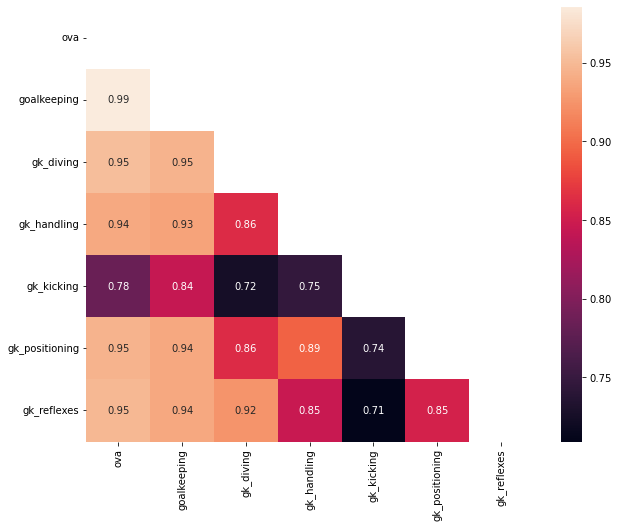

In [41]:
mask = np.zeros_like(goalkeeper.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(goalkeeper.corr(), mask=mask, annot=True)
plt.show()

In [42]:
y = goalkeeper["ova"]
X = goalkeeper.drop(['ova'], axis=1)
X.head()

,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
ID,,,,,,
488,346,83,88,62,92,83
684,357,70,73,67,78,69
805,323,77,82,75,88,76
1001,340,71,70,60,71,68
1179,396,77,76,74,91,78


In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
lm = linear_model.LinearRegression()
lm.fit(x_train,y_train)
predictions = lm.predict(x_test) 
r2_score(y_test, predictions)

0.9898297495319927

In [45]:

r2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE =", MAE)

r2 =  0.9898297495319927
RMSE =  0.7711671033599238
MSE =  0.5946987013045354
MAE = 0.5848507741450375


<AxesSubplot:xlabel='ova'>

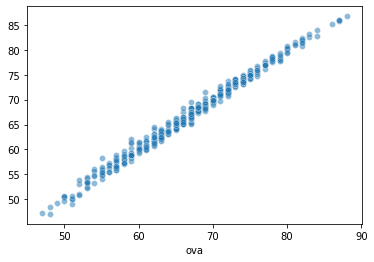

In [46]:
sns.scatterplot(y_test, predictions, alpha=0.5)

### VALUE linear regression of gk

#### In this section we train our model using goalkeepers' skills to test "value". 

In [47]:
value = df[['bp','value','goalkeeping','gk_diving','gk_handling','gk_kicking','gk_positioning', 'gk_reflexes']]

In [48]:
value=value.loc[value['bp']=='GK'] # we filter out the best positions on GK values

In [49]:
value.drop(['bp'], axis=1, inplace=True) #since BP has only one value, its no longer needed

In [50]:
value.head()

,value,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
ID,,,,,,,
488,0.0,346,83,88,62,92,83
684,500000.0,357,70,73,67,78,69
805,0.0,323,77,82,75,88,76
1001,0.0,340,71,70,60,71,68
1179,2200000.0,396,77,76,74,91,78


In [51]:
value["value"] = value["value"].astype(int)

#### a correlation matrix

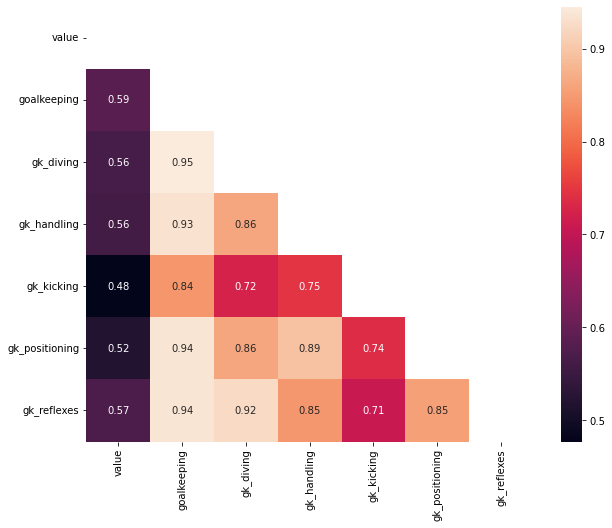

In [52]:
mask = np.zeros_like(value.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(value.corr(), mask=mask, annot=True)
plt.show()

In [53]:
yv = value["value"]
Xv = value.drop(['value'], axis=1)
Xv.head()

,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
ID,,,,,,
488,346,83,88,62,92,83
684,357,70,73,67,78,69
805,323,77,82,75,88,76
1001,340,71,70,60,71,68
1179,396,77,76,74,91,78


In [54]:
Xv_train, Xv_test, Yv_train, Yv_test = train_test_split(Xv, yv, test_size=0.3)

In [55]:
Xv_train.shape, Yv_train.shape

((1103, 6), (1103,))

In [56]:
Xv_test.shape, Yv_test.shape

((473, 6), (473,))

In [57]:
lmv = linear_model.LinearRegression()
lmv.fit(Xv_train,Yv_train)
Y_predv = lmv.predict(Xv_test)
r2_score(Yv_test, Y_predv)


0.34693069194446546

<AxesSubplot:xlabel='value'>

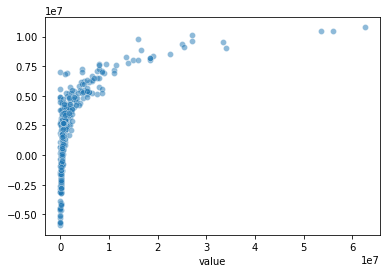

In [58]:
sns.scatterplot(Yv_test, Y_predv, alpha=0.5)

### OVA  linear regression with 6 generic attributes

#### In this section we train our model using players' 6 generic skills to test OVA. 

In [59]:
player = df[['bp','ova','pac','sho', 'pas','dri','def','phy']]

In [60]:
player=player.loc[player['bp']!='GK']

In [61]:
player.head()

,bp,ova,pac,sho,pas,dri,def,phy
ID,,,,,,,,
2,LWB,69,71,59,70,71,68,69
16,CM,71,53,69,73,69,58,63
27,CAM,71,45,68,76,77,36,52
36,ST,68,61,66,66,69,47,60
41,CAM,81,58,70,85,85,63,59


In [62]:
player.isna().sum()

bp     0
ova    0
pac    0
sho    0
pas    0
dri    0
def    0
phy    0
dtype: int64

In [63]:
player.drop(['bp'], axis=1, inplace=True)

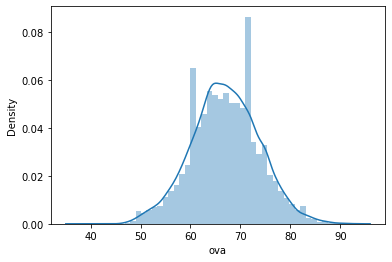

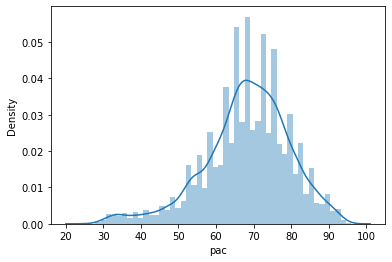

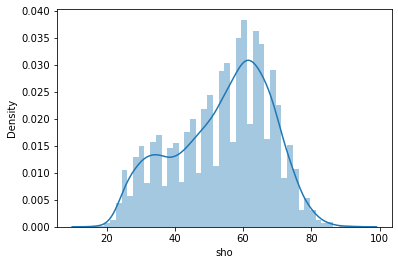

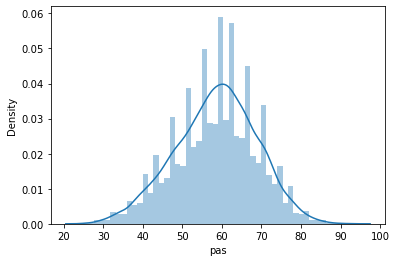

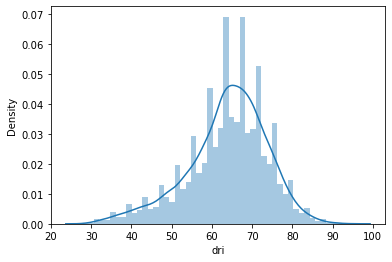

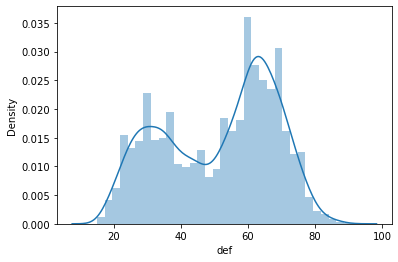

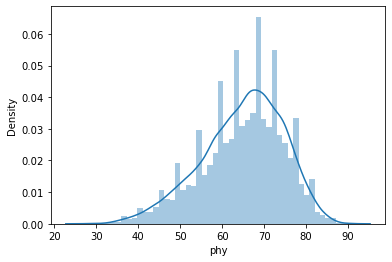

In [64]:
for column in player.columns:
    sns.distplot(player[column])
    plt.show()

#### a correlation matrix

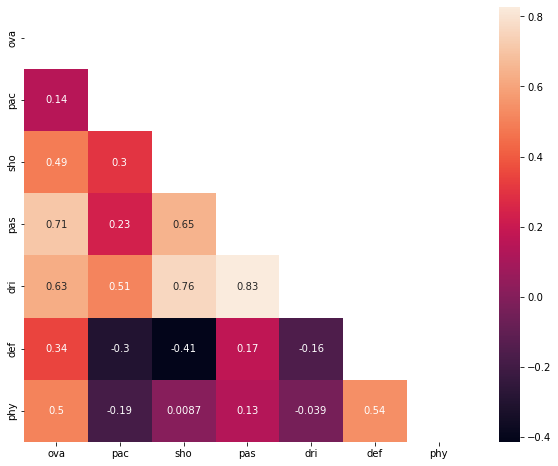

In [65]:
mask = np.zeros_like(player.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(player.corr(), mask=mask, annot=True)
plt.show()

In [66]:
yp = player["ova"]
Xp = player.drop(['ova'], axis=1)
Xp.head()

,pac,sho,pas,dri,def,phy
ID,,,,,,
2,71,59,70,71,68,69
16,53,69,73,69,58,63
27,45,68,76,77,36,52
36,61,66,66,69,47,60
41,58,70,85,85,63,59


In [67]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.3)

In [68]:
Xp_train.shape, yp_train.shape

((10884, 6), (10884,))

In [69]:
Xp_test.shape, yp_test.shape

((4665, 6), (4665,))

In [70]:
lmp = linear_model.LinearRegression()
lmp.fit(Xp_train,yp_train)
yp_pred = lmp.predict(Xp_test)
r2_score(yp_test,yp_pred)

0.7266834397906586

In [71]:
r2p = r2_score(yp_test, yp_pred)
RMSEp = mean_squared_error(yp_test, yp_pred, squared=False)
MSEp = mean_squared_error(yp_test, yp_pred)
MAEp = mean_absolute_error(yp_test, yp_pred)
print("r2 = ", r2p)
print("RMSE = ", RMSEp)
print("MSE = ", MSEp)
print("MAE =", MAEp)

r2 =  0.7266834397906586
RMSE =  3.588162567517157
MSE =  12.874910610931316
MAE = 2.860407203943622


<AxesSubplot:xlabel='ova'>

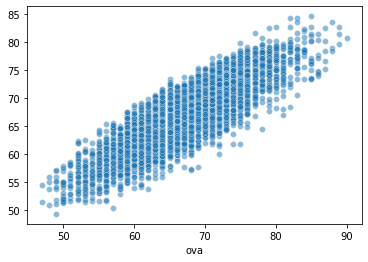

In [72]:
sns.scatterplot(yp_test, yp_pred, alpha=0.5)

### value linear regression 30 skills

#### In this section we train our model using players' 30 skills to test "value" column

In [73]:
skills = df[['bp','value','acceleration','sprint_speed','agility','balance','ball_control', 'composure','dribbling','reactions','finishing','long_shots','penalties','positioning','shot_power','volleys','heading_accuracy','interceptions','marking','sliding_tackle','standing_tackle','crossing','curve','fk_accuracy','long_passing','short_passing','vision','aggression','jumping','stamina','strength']]

In [74]:
skills=skills.loc[skills['bp']!='GK']

In [75]:
skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15549 entries, 2 to 259105
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bp                15549 non-null  object 
 1   value             15549 non-null  float64
 2   acceleration      15549 non-null  int64  
 3   sprint_speed      15549 non-null  int64  
 4   agility           15495 non-null  float64
 5   balance           15495 non-null  float64
 6   ball_control      15549 non-null  int64  
 7   composure         15160 non-null  float64
 8   dribbling         15549 non-null  int64  
 9   reactions         15549 non-null  int64  
 10  finishing         15549 non-null  int64  
 11  long_shots        15549 non-null  int64  
 12  penalties         15549 non-null  int64  
 13  positioning       15544 non-null  float64
 14  shot_power        15549 non-null  int64  
 15  volleys           15495 non-null  float64
 16  heading_accuracy  15549 non-null  int64

In [76]:
skills.isna().sum()

bp                    0
value                 0
acceleration          0
sprint_speed          0
agility              54
balance              54
ball_control          0
composure           389
dribbling             0
reactions             0
finishing             0
long_shots            0
penalties             0
positioning           5
shot_power            0
volleys              54
heading_accuracy      0
interceptions         5
marking               0
sliding_tackle       54
standing_tackle       0
crossing              0
curve                54
fk_accuracy           0
long_passing          0
short_passing         0
vision               54
aggression            0
jumping              54
stamina               0
strength              0
dtype: int64

In [77]:
skills = skills[skills['composure'].notna()]
skills.isna().sum()

bp                  0
value               0
acceleration        0
sprint_speed        0
agility             0
balance             0
ball_control        0
composure           0
dribbling           0
reactions           0
finishing           0
long_shots          0
penalties           0
positioning         0
shot_power          0
volleys             0
heading_accuracy    0
interceptions       0
marking             0
sliding_tackle      0
standing_tackle     0
crossing            0
curve               0
fk_accuracy         0
long_passing        0
short_passing       0
vision              0
aggression          0
jumping             0
stamina             0
strength            0
dtype: int64

In [78]:
skills=skills.astype({"agility":'int',"balance":'int',"composure":'int',"positioning":'int',"volleys":'int',"interceptions":'int',"sliding_tackle":'int',"curve":'int',"vision":'int',"jumping":'int',"value":'int'})

In [79]:
skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15160 entries, 16 to 259105
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bp                15160 non-null  object
 1   value             15160 non-null  int32 
 2   acceleration      15160 non-null  int64 
 3   sprint_speed      15160 non-null  int64 
 4   agility           15160 non-null  int32 
 5   balance           15160 non-null  int32 
 6   ball_control      15160 non-null  int64 
 7   composure         15160 non-null  int32 
 8   dribbling         15160 non-null  int64 
 9   reactions         15160 non-null  int64 
 10  finishing         15160 non-null  int64 
 11  long_shots        15160 non-null  int64 
 12  penalties         15160 non-null  int64 
 13  positioning       15160 non-null  int32 
 14  shot_power        15160 non-null  int64 
 15  volleys           15160 non-null  int32 
 16  heading_accuracy  15160 non-null  int64 
 17  intercepti

In [80]:
skills.drop(['bp'], axis=1, inplace=True)

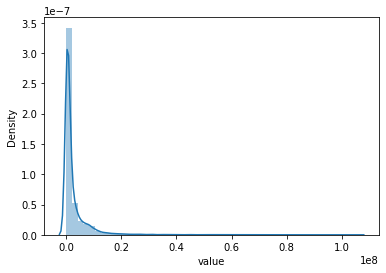

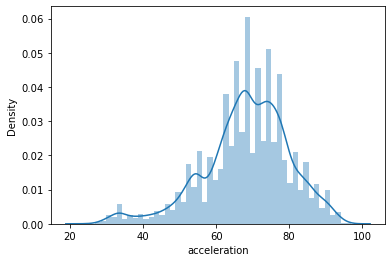

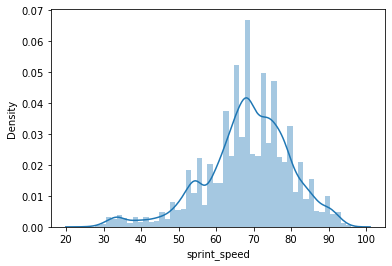

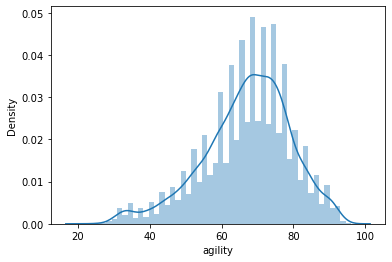

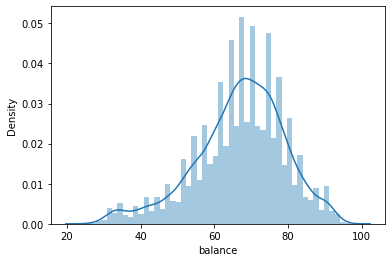

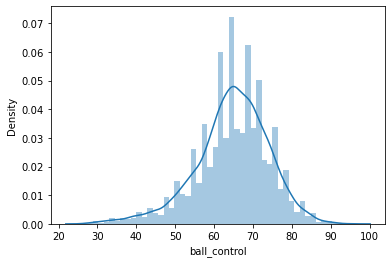

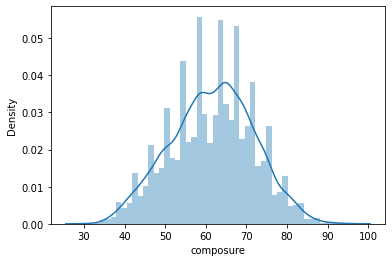

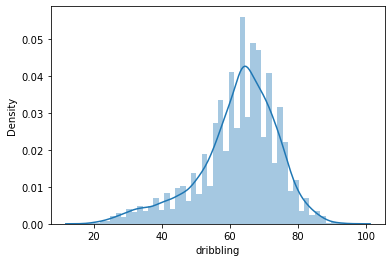

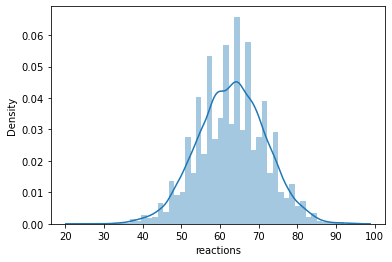

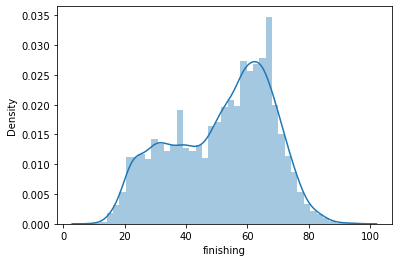

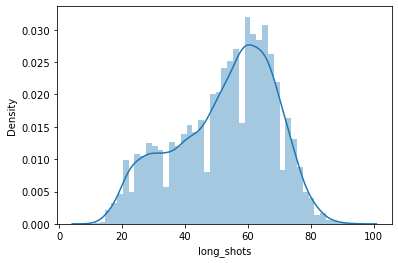

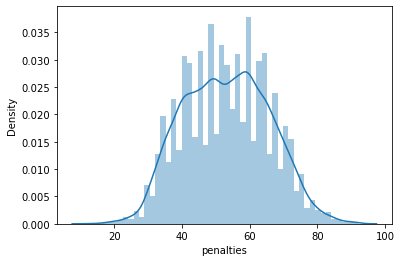

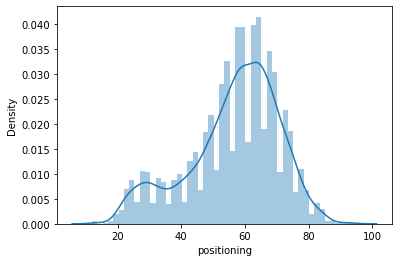

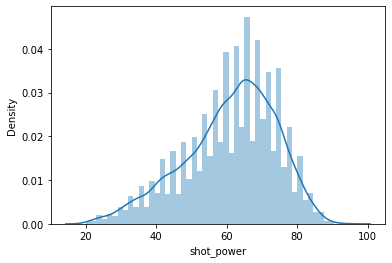

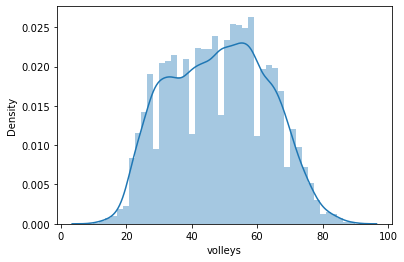

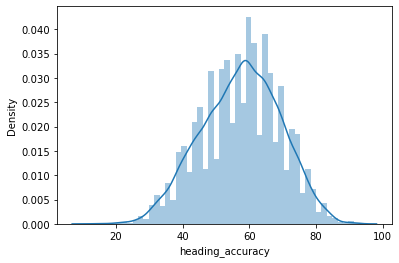

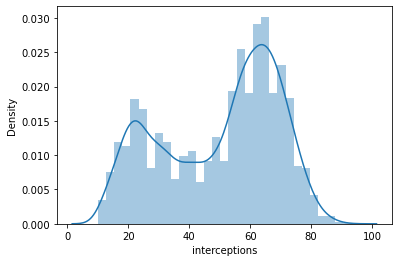

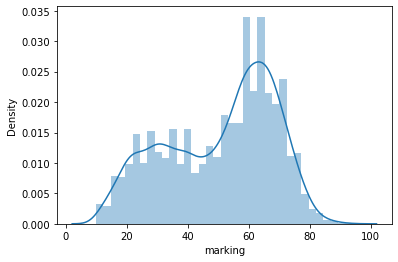

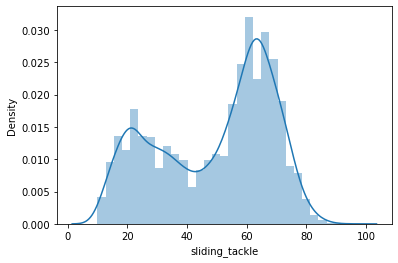

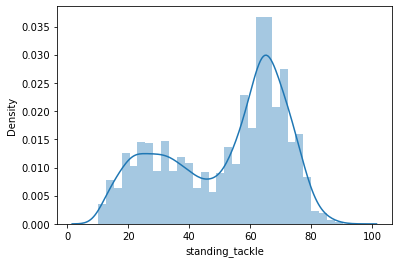

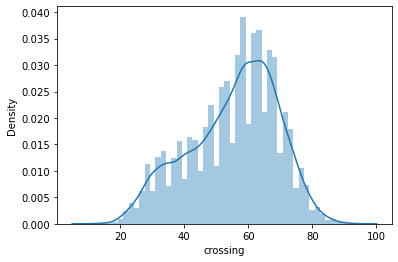

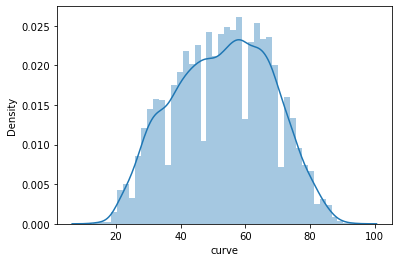

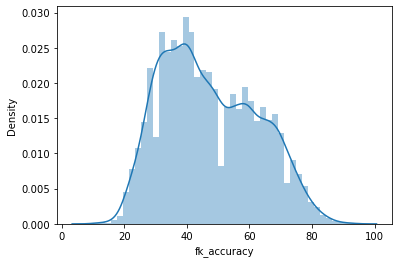

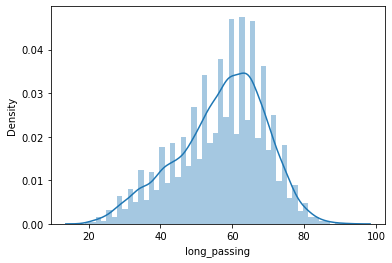

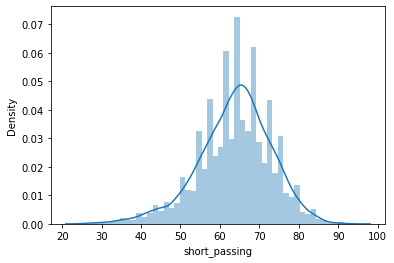

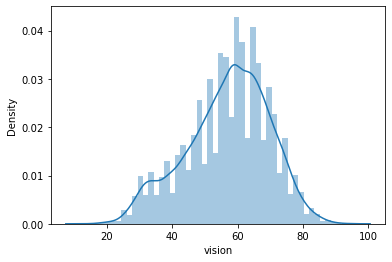

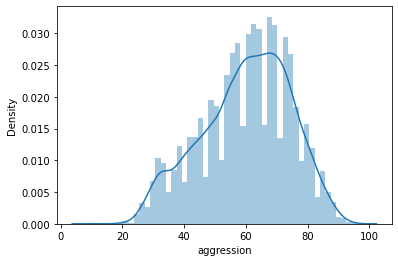

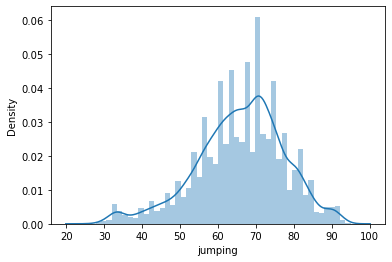

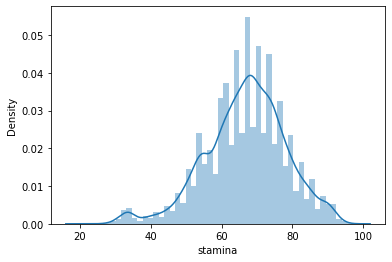

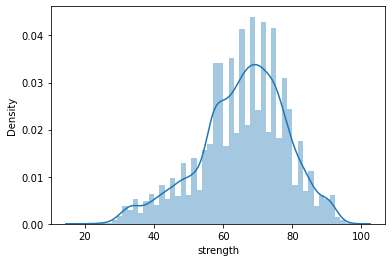

In [81]:
for column in skills.columns:
    sns.distplot(skills[column])
    plt.show()

In [82]:
ys = skills["value"]
Xs = skills.drop(['value'], axis=1)
Xs.head()

,acceleration,sprint_speed,agility,balance,ball_control,composure,dribbling,reactions,finishing,long_shots,...,crossing,curve,fk_accuracy,long_passing,short_passing,vision,aggression,jumping,stamina,strength
ID,,,,,,,,,,,,,,,,,,,,,
16,56,50,62,72,71,79,69,65,64,71,...,68,79,79,71,76,73,71,54,64,60
41,61,56,79,75,90,89,85,75,69,70,...,75,80,70,83,90,93,58,40,58,62
80,54,36,67,81,81,80,77,70,66,76,...,80,83,80,85,84,85,87,72,51,64
330,69,68,77,83,84,86,82,83,84,80,...,68,82,63,63,81,82,67,62,72,68
1238,43,34,59,60,91,85,82,79,81,86,...,83,75,90,85,90,91,69,34,54,75


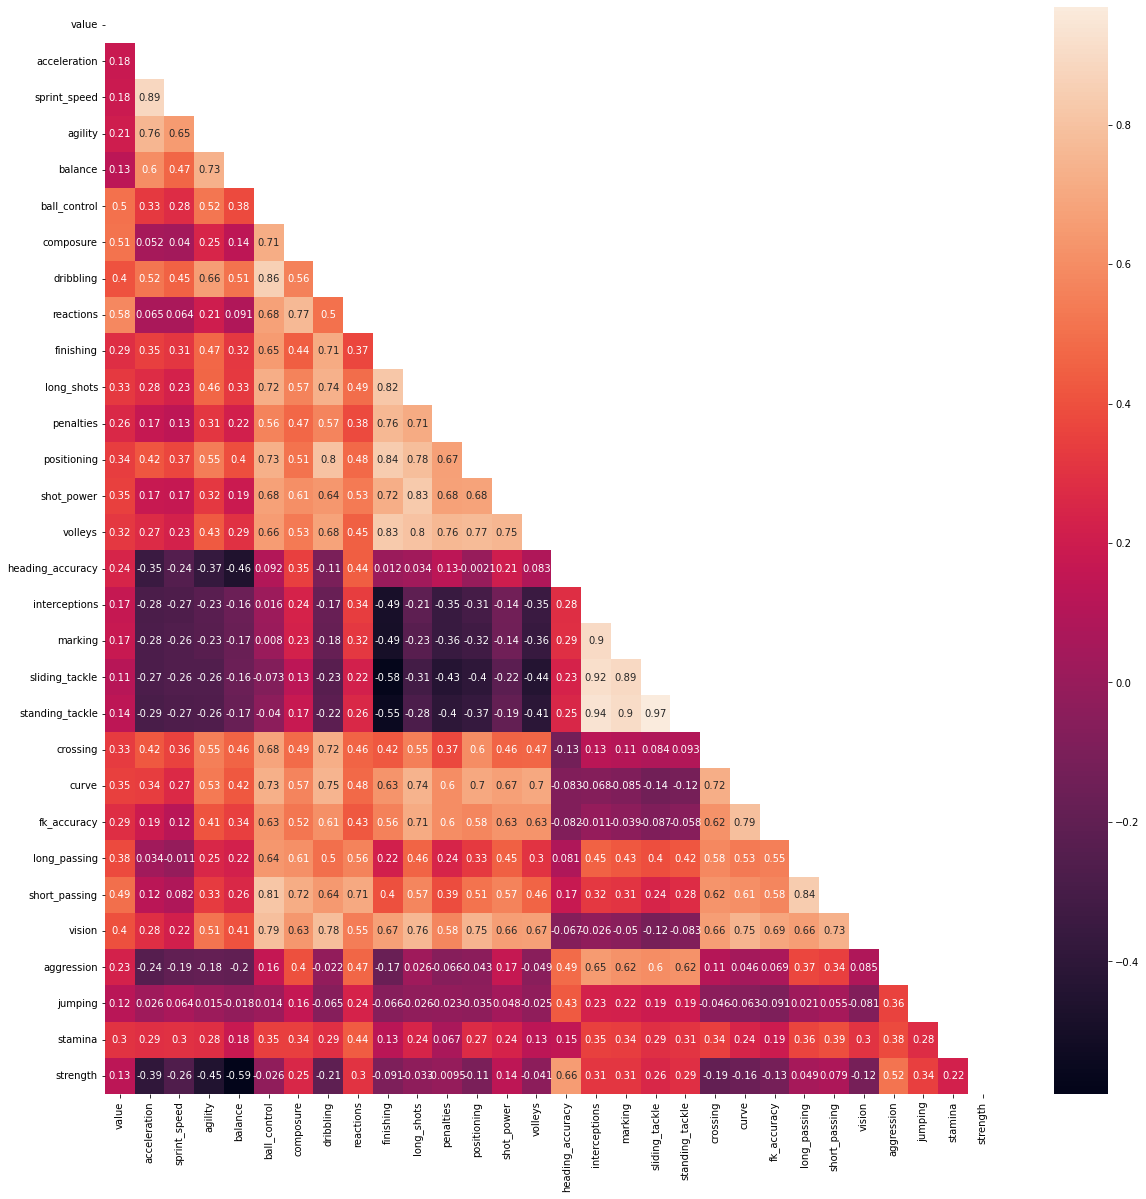

In [83]:
mask = np.zeros_like(skills.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(skills.corr(), mask=mask, annot=True)
plt.show()

In [84]:
ys = skills["value"]
Xs = skills.drop(['value'], axis=1)
Xs.head()

,acceleration,sprint_speed,agility,balance,ball_control,composure,dribbling,reactions,finishing,long_shots,...,crossing,curve,fk_accuracy,long_passing,short_passing,vision,aggression,jumping,stamina,strength
ID,,,,,,,,,,,,,,,,,,,,,
16,56,50,62,72,71,79,69,65,64,71,...,68,79,79,71,76,73,71,54,64,60
41,61,56,79,75,90,89,85,75,69,70,...,75,80,70,83,90,93,58,40,58,62
80,54,36,67,81,81,80,77,70,66,76,...,80,83,80,85,84,85,87,72,51,64
330,69,68,77,83,84,86,82,83,84,80,...,68,82,63,63,81,82,67,62,72,68
1238,43,34,59,60,91,85,82,79,81,86,...,83,75,90,85,90,91,69,34,54,75


In [85]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3)

In [86]:
Xs_train.shape, ys_train.shape

((10612, 29), (10612,))

In [87]:
Xs_test.shape, ys_test.shape

((4548, 29), (4548,))

In [88]:
lms = linear_model.LinearRegression()
lms.fit(Xs_train,ys_train)
ys_pred = lms.predict(Xs_test)
r2_score(ys_test,ys_pred)

0.3939819000130619

In [89]:
#This is correct
r2s = r2_score(ys_test, ys_pred)
RMSEs = mean_squared_error(ys_test, ys_pred, squared=False)
MSEs = mean_squared_error(ys_test, ys_pred)
MAEs = mean_absolute_error(ys_test, ys_pred)
print("r2 = ", r2s)
print("RMSE = ", RMSEs)
print("MSE = ", MSEs)
print("MAE =", MAEs)

r2 =  0.3939819000130619
RMSE =  3896078.0888078813
MSE =  15179424474088.873
MAE = 2314250.104599259


<AxesSubplot:xlabel='value'>

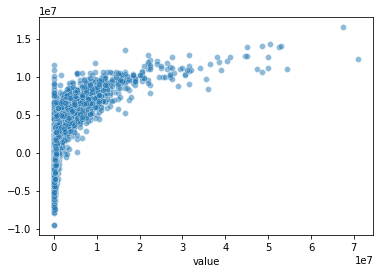

In [90]:
sns.scatterplot(ys_test, ys_pred, alpha=0.5)

### OVA based on 30 skills linear regression

#### In this section we train our model using players' 30 skills to test OVA. 

In [91]:
attributes = df[['bp','ova','acceleration','sprint_speed','agility','balance','ball_control', 'composure','dribbling','reactions','finishing','long_shots','penalties','positioning','shot_power','volleys','heading_accuracy','interceptions','marking','sliding_tackle','standing_tackle','crossing','curve','fk_accuracy','long_passing','short_passing','vision','aggression','jumping','stamina','strength']]

In [92]:
attributes=attributes.loc[attributes['bp']!='GK']

In [93]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15549 entries, 2 to 259105
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bp                15549 non-null  object 
 1   ova               15549 non-null  int64  
 2   acceleration      15549 non-null  int64  
 3   sprint_speed      15549 non-null  int64  
 4   agility           15495 non-null  float64
 5   balance           15495 non-null  float64
 6   ball_control      15549 non-null  int64  
 7   composure         15160 non-null  float64
 8   dribbling         15549 non-null  int64  
 9   reactions         15549 non-null  int64  
 10  finishing         15549 non-null  int64  
 11  long_shots        15549 non-null  int64  
 12  penalties         15549 non-null  int64  
 13  positioning       15544 non-null  float64
 14  shot_power        15549 non-null  int64  
 15  volleys           15495 non-null  float64
 16  heading_accuracy  15549 non-null  int64

In [94]:
attributes.isna().sum()

bp                    0
ova                   0
acceleration          0
sprint_speed          0
agility              54
balance              54
ball_control          0
composure           389
dribbling             0
reactions             0
finishing             0
long_shots            0
penalties             0
positioning           5
shot_power            0
volleys              54
heading_accuracy      0
interceptions         5
marking               0
sliding_tackle       54
standing_tackle       0
crossing              0
curve                54
fk_accuracy           0
long_passing          0
short_passing         0
vision               54
aggression            0
jumping              54
stamina               0
strength              0
dtype: int64

In [95]:
attributes = attributes[attributes['composure'].notna()]
attributes.isna().sum()

bp                  0
ova                 0
acceleration        0
sprint_speed        0
agility             0
balance             0
ball_control        0
composure           0
dribbling           0
reactions           0
finishing           0
long_shots          0
penalties           0
positioning         0
shot_power          0
volleys             0
heading_accuracy    0
interceptions       0
marking             0
sliding_tackle      0
standing_tackle     0
crossing            0
curve               0
fk_accuracy         0
long_passing        0
short_passing       0
vision              0
aggression          0
jumping             0
stamina             0
strength            0
dtype: int64

In [96]:
attributes=attributes.astype({"agility":'int',"balance":'int',"composure":'int',"positioning":'int',"volleys":'int',"interceptions":'int',"sliding_tackle":'int',"curve":'int',"vision":'int',"jumping":'int'})

In [97]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15160 entries, 16 to 259105
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bp                15160 non-null  object
 1   ova               15160 non-null  int64 
 2   acceleration      15160 non-null  int64 
 3   sprint_speed      15160 non-null  int64 
 4   agility           15160 non-null  int32 
 5   balance           15160 non-null  int32 
 6   ball_control      15160 non-null  int64 
 7   composure         15160 non-null  int32 
 8   dribbling         15160 non-null  int64 
 9   reactions         15160 non-null  int64 
 10  finishing         15160 non-null  int64 
 11  long_shots        15160 non-null  int64 
 12  penalties         15160 non-null  int64 
 13  positioning       15160 non-null  int32 
 14  shot_power        15160 non-null  int64 
 15  volleys           15160 non-null  int32 
 16  heading_accuracy  15160 non-null  int64 
 17  intercepti

In [98]:
attributes.drop(['bp'], axis=1, inplace=True)

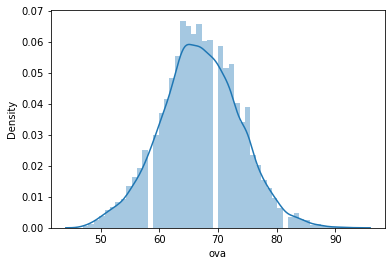

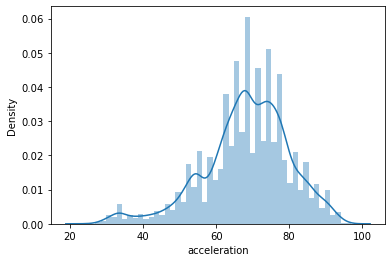

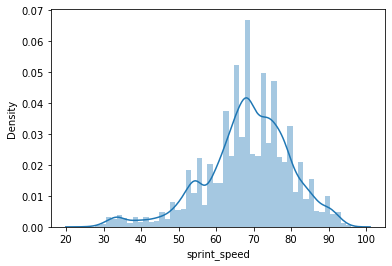

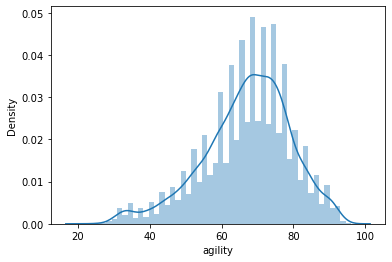

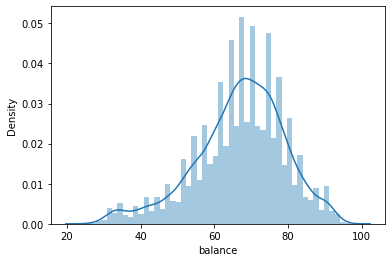

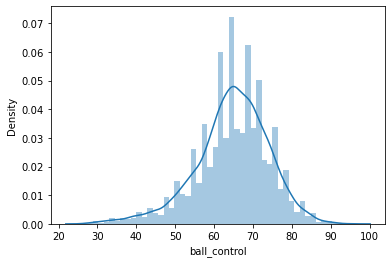

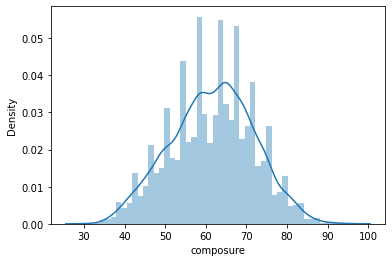

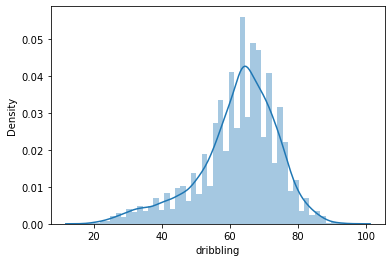

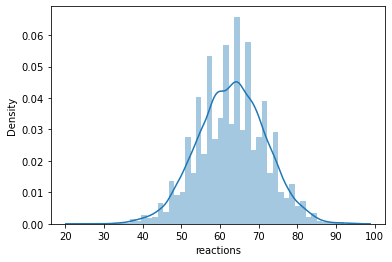

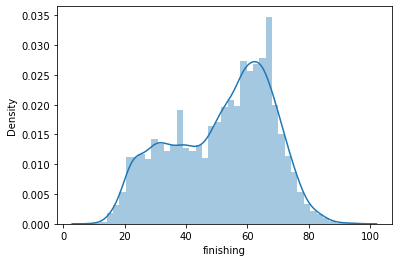

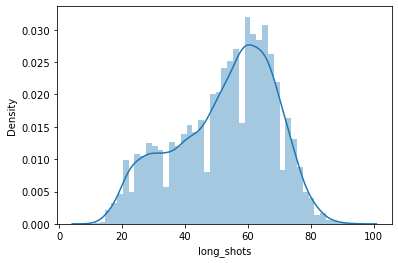

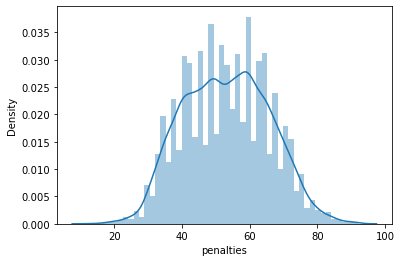

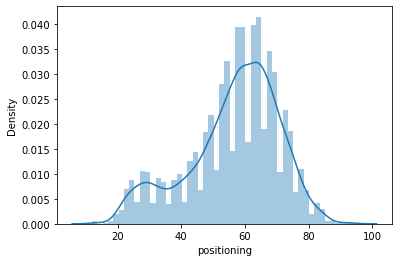

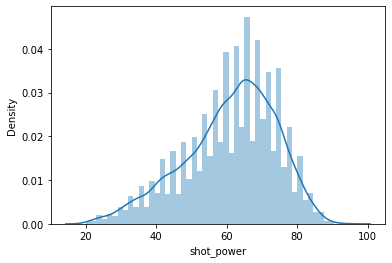

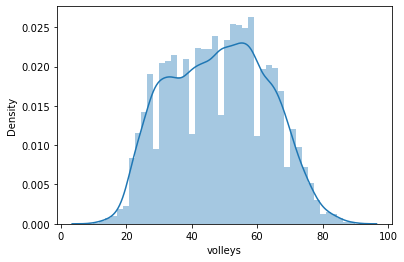

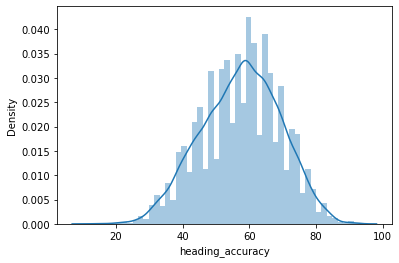

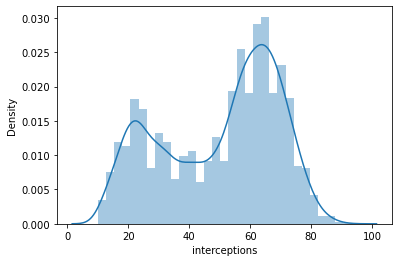

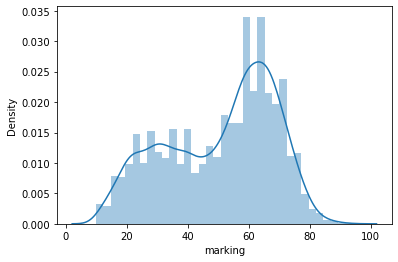

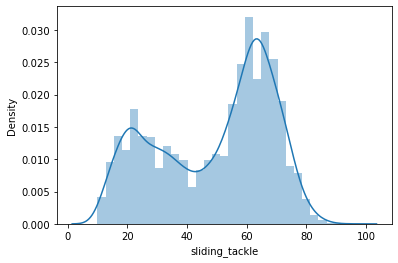

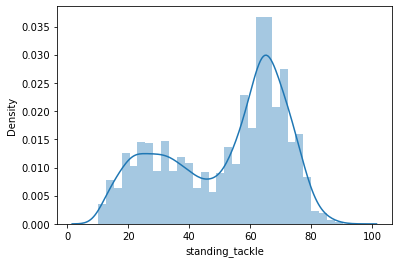

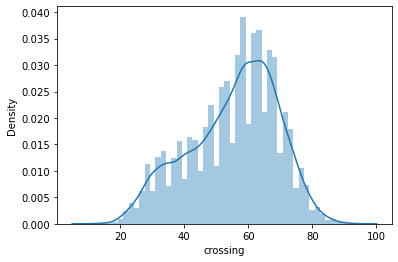

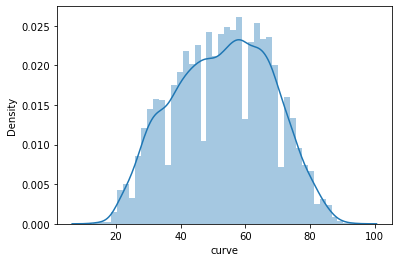

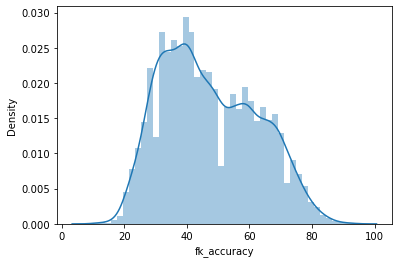

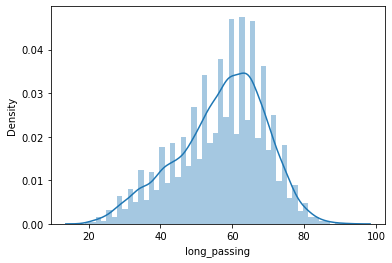

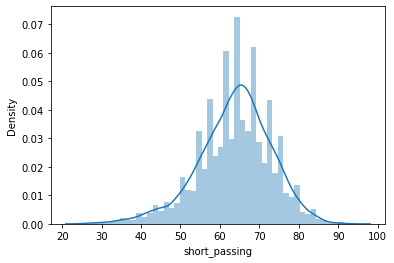

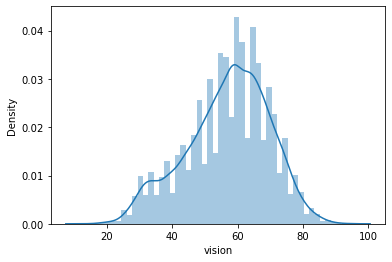

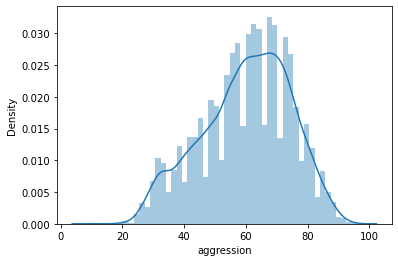

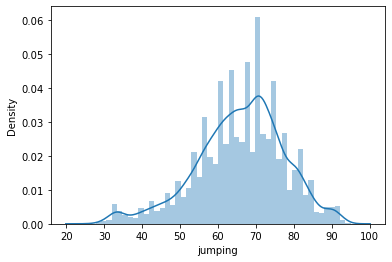

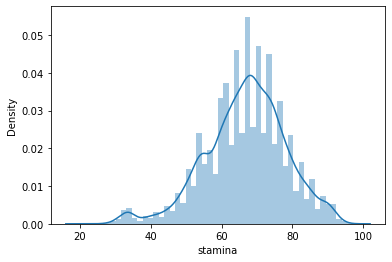

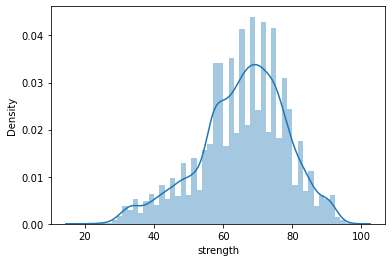

In [99]:
for column in attributes.columns:
    sns.distplot(attributes[column])
    plt.show()

#### a correlation matrix

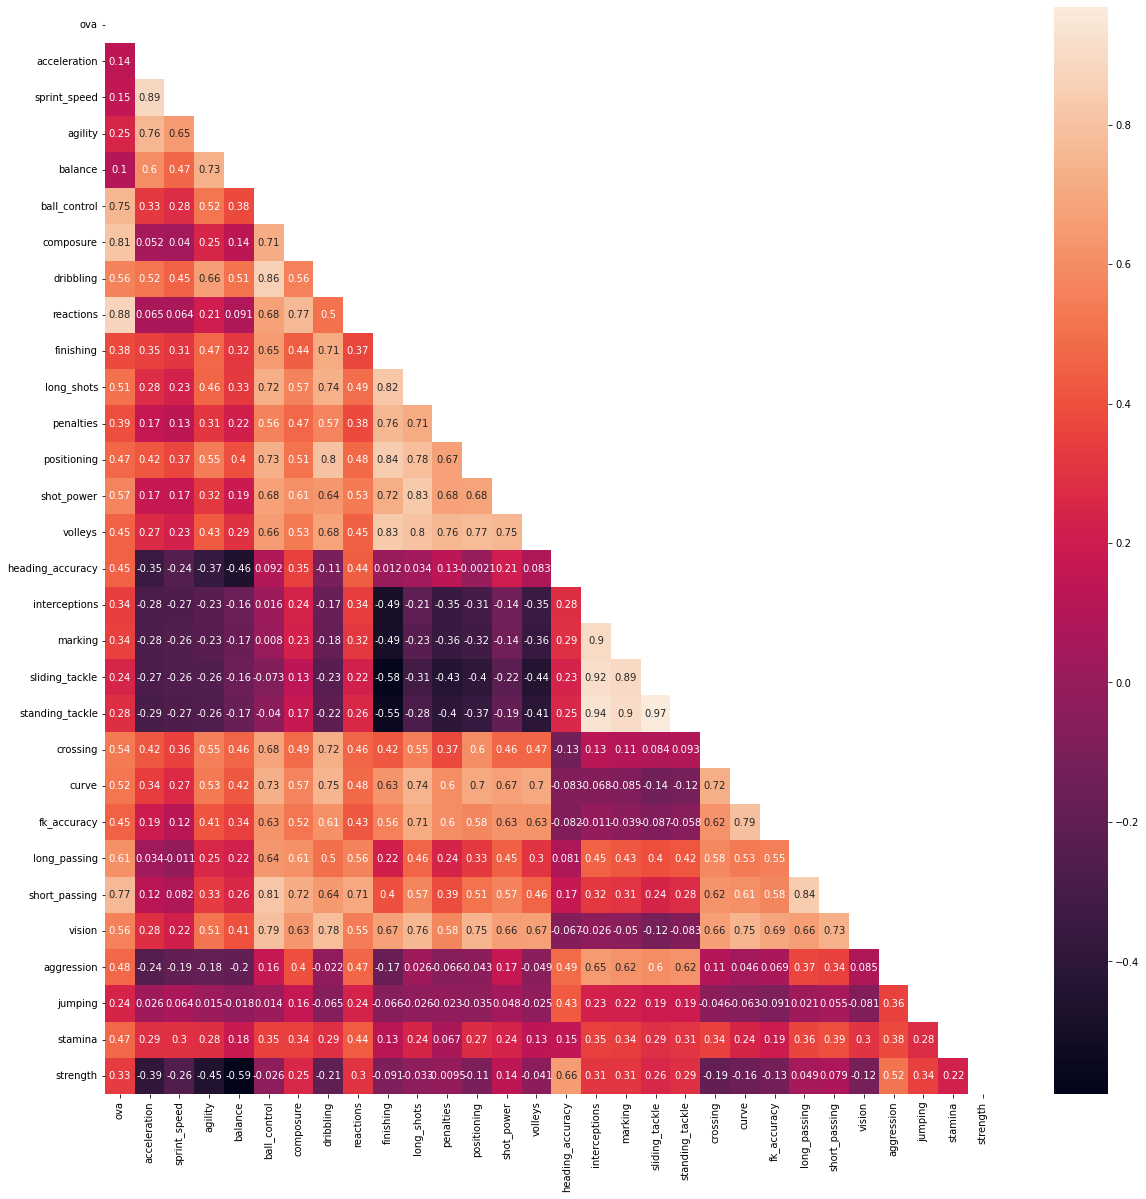

In [100]:
mask = np.zeros_like(attributes.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(attributes.corr(), mask=mask, annot=True)
plt.show()

In [101]:
ya = attributes["ova"]
Xa = attributes.drop(['ova'], axis=1)
Xa.head()

,acceleration,sprint_speed,agility,balance,ball_control,composure,dribbling,reactions,finishing,long_shots,...,crossing,curve,fk_accuracy,long_passing,short_passing,vision,aggression,jumping,stamina,strength
ID,,,,,,,,,,,,,,,,,,,,,
16,56,50,62,72,71,79,69,65,64,71,...,68,79,79,71,76,73,71,54,64,60
41,61,56,79,75,90,89,85,75,69,70,...,75,80,70,83,90,93,58,40,58,62
80,54,36,67,81,81,80,77,70,66,76,...,80,83,80,85,84,85,87,72,51,64
330,69,68,77,83,84,86,82,83,84,80,...,68,82,63,63,81,82,67,62,72,68
1238,43,34,59,60,91,85,82,79,81,86,...,83,75,90,85,90,91,69,34,54,75


In [102]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.3)

In [103]:
Xa_train.shape, ya_train.shape

((10612, 29), (10612,))

In [104]:
Xa_test.shape, ya_test.shape

((4548, 29), (4548,))

In [105]:
lma = linear_model.LinearRegression()
lma.fit(Xa_train,ya_train)
ya_pred = lma.predict(Xa_test)
r2_score(ya_test,ya_pred)

0.8866798933851834

In [106]:
r2a = r2_score(ya_test, ya_pred)
RMSEa = mean_squared_error(ya_test, ya_pred, squared=False)
MSEa = mean_squared_error(ya_test, ya_pred)
MAEa = mean_absolute_error(ya_test, ya_pred)
print("r2 = ", r2a)
print("RMSE = ", RMSEa)
print("MSE = ", MSEa)
print("MAE =", MAEa)

r2 =  0.8866798933851834
RMSE =  2.2693829002410975
MSE =  5.150098747906695
MAE = 1.7847323385892657


<AxesSubplot:xlabel='ova'>

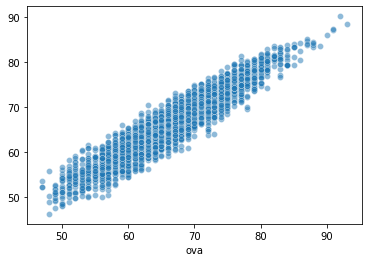

In [107]:
sns.scatterplot(ya_test, ya_pred, alpha=0.5)

#### Vanilla model

In [108]:
df.select_dtypes(include = ['object'])


,bp,height,weight,foot,loan_date_end,contract,a/w,d/w,hits
ID,,,,,,,,,
2,LWB,"6'0""",181lbs,Left,NaN,2008 ~ 2016,Medium,High,4
16,CM,"5'10""",143lbs,Right,NaN,2014 ~ 2019,Medium,Medium,4
27,CAM,"5'9""",161lbs,Right,NaN,2016 ~ 2020,Medium,Low,11
36,ST,"5'11""",165lbs,Right,NaN,2009,NaN,NaN,3
41,CAM,"5'7""",150lbs,Right,NaN,2018 ~ 2021,High,Medium,149
...,...,...,...,...,...,...,...,...,...
259088,CB,"6'6""",165lbs,Right,"Jun 30, 2021","Jun 30, 2021 On Loan",Medium,Medium,5
259090,CAM,"5'10""",170lbs,Right,NaN,2020 ~ 2021,Medium,Medium,5
259091,RB,"5'9""",154lbs,Right,NaN,2020 ~ 2022,Medium,Medium,3


In [109]:
df.drop(['bp', 'height', 'weight', 'loan_date_end', 'contract', 'hits'], axis =1, inplace =True)
df.head()

,age,ova,bov,pot,foot,growth,value,wage,release_clause,attacking,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
ID,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,Left,0,625000.0,7000.0,0.0,313,...,70,70,70,71,70,69,69,69,70,17
16,37,71,70,71,Right,0,600000.0,7000.0,1100000.0,337,...,66,66,66,62,60,60,60,60,60,17
27,33,71,71,71,Right,0,1100000.0,15000.0,0.0,337,...,54,54,54,52,47,46,46,46,47,15
36,36,68,70,82,Right,14,0.0,0.0,0.0,264,...,65,65,65,56,57,51,51,51,57,22
41,36,81,82,81,Right,0,5500000.0,12000.0,7200000.0,367,...,73,73,73,70,67,64,64,64,67,17


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 2 to 259105
Data columns (total 90 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               17125 non-null  int64  
 1   ova               17125 non-null  int64  
 2   bov               17125 non-null  int64  
 3   pot               17125 non-null  int64  
 4   foot              17125 non-null  object 
 5   growth            17125 non-null  int64  
 6   value             17125 non-null  float64
 7   wage              17125 non-null  float64
 8   release_clause    17125 non-null  float64
 9   attacking         17125 non-null  int64  
 10  crossing          17125 non-null  int64  
 11  finishing         17125 non-null  int64  
 12  heading_accuracy  17125 non-null  int64  
 13  short_passing     17125 non-null  int64  
 14  volleys           17067 non-null  float64
 15  skill             17125 non-null  int64  
 16  dribbling         17125 non-null  int64

In [111]:
numeric = df.select_dtypes(include=np.number)
numeric.head()

,age,ova,bov,pot,growth,value,wage,release_clause,attacking,crossing,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
ID,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,0,625000.0,7000.0,0.0,313,75,...,70,70,70,71,70,69,69,69,70,17
16,37,71,70,71,0,600000.0,7000.0,1100000.0,337,68,...,66,66,66,62,60,60,60,60,60,17
27,33,71,71,71,0,1100000.0,15000.0,0.0,337,80,...,54,54,54,52,47,46,46,46,47,15
36,36,68,70,82,14,0.0,0.0,0.0,264,54,...,65,65,65,56,57,51,51,51,57,22
41,36,81,82,81,0,5500000.0,12000.0,7200000.0,367,75,...,73,73,73,70,67,64,64,64,67,17


In [112]:
categorical = df.select_dtypes(include = ['object'])
categorical.head()

,foot,a/w,d/w
ID,,,
2,Left,Medium,High
16,Right,Medium,Medium
27,Right,Medium,Low
36,Right,NaN,NaN
41,Right,High,Medium


In [113]:
print(f'There are {len(numeric.columns)} numeric columns and {len(categorical.columns)} categorical columns')

There are 87 numeric columns and 3 categorical columns


In [114]:
print(f'The categorical columns are {categorical.columns.tolist()}')

The categorical columns are ['foot', 'a/w', 'd/w']


In [115]:
print(f'The numerical columns are {numeric.columns.tolist()}')

The numerical columns are ['age', 'ova', 'bov', 'pot', 'growth', 'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'w/f', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']


In [116]:
categorical = pd.get_dummies(categorical, drop_first=True)
categorical

,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
ID,,,,,
2,0,0,1,0,0
16,1,0,1,0,1
27,1,0,1,1,0
36,1,0,0,0,0
41,1,0,0,0,1
...,...,...,...,...,...
259088,1,0,1,0,1
259090,1,0,1,0,1
259091,1,0,1,0,1


In [117]:
joined_num = pd.concat([numeric, categorical], axis =1)

joined_num.head()

,age,ova,bov,pot,growth,value,wage,release_clause,attacking,crossing,...,lcb,cb,rcb,rb,gk,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
ID,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,0,625000.0,7000.0,0.0,313,75,...,69,69,69,70,17,0,0,1,0,0
16,37,71,70,71,0,600000.0,7000.0,1100000.0,337,68,...,60,60,60,60,17,1,0,1,0,1
27,33,71,71,71,0,1100000.0,15000.0,0.0,337,80,...,46,46,46,47,15,1,0,1,1,0
36,36,68,70,82,14,0.0,0.0,0.0,264,54,...,51,51,51,57,22,1,0,0,0,0
41,36,81,82,81,0,5500000.0,12000.0,7200000.0,367,75,...,64,64,64,67,17,1,0,0,0,1


In [118]:
joined_num = joined_num.dropna() # drop null values

In [119]:
joined_num.shape

(16702, 92)

In [120]:
yJ = joined_num["value"]
XJ = joined_num.drop(['value'], axis=1)
XJ.head()

,age,ova,bov,pot,growth,wage,release_clause,attacking,crossing,finishing,...,lcb,cb,rcb,rb,gk,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
ID,,,,,,,,,,,,,,,,,,,,,
16,37,71,70,71,0,7000.0,1100000.0,337,68,64,...,60,60,60,60,17,1,0,1,0,1
41,36,81,82,81,0,12000.0,7200000.0,367,75,69,...,64,64,64,67,17,1,0,0,0,1
80,38,77,77,77,0,44000.0,5300000.0,342,80,66,...,65,65,65,64,16,0,0,1,0,1
330,35,80,81,80,0,10000.0,0.0,380,68,84,...,47,47,47,52,20,1,0,0,1,0
1179,42,82,82,82,0,41000.0,3600000.0,95,13,15,...,29,29,29,26,80,1,0,1,0,1


In [121]:
XJ_train, XJ_test, yJ_train, yJ_test = train_test_split(XJ, yJ, test_size=0.3)

In [122]:
lmJ = linear_model.LinearRegression()
lmJ.fit(XJ_train,yJ_train)
yJ_pred = lmJ.predict(XJ_test)
r2_score(yJ_test,yJ_pred)

0.9702554524734249

<AxesSubplot:xlabel='value'>

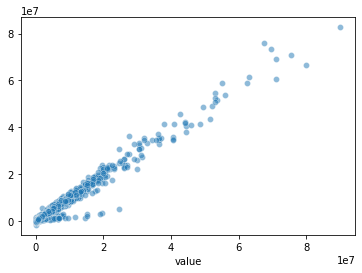

In [123]:
sns.scatterplot(yJ_test, yJ_pred, alpha=0.5)

## OUTCOMES: 
- goalkeepers OVA is highly correlated with specific goalkeeper attributes (r2 is 0.98 )
- all players OVA is less correlated with on 6 generic attribues ( r2 0.72) than OVA of 30 skills with r2 score 0.88. 30 skills are better in preidcting OVA than 6 skilss. 
- the value of goalkeepers is not highly correlated with goalkeeper attribues (r2 score 0.35)
- the value of all players is not highly correlated with player attributes. (r2 score 0.39)
- the vanilla regression showed that value is highly correlated with majority of the columns (r2 score 0.97). 